# Neural & Behavioral Modeling - Week 2 (Exercises)
by 張天瑋 B09705049 b09705049@ntu.edu.tw

In [3]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Nonlinear love triangle (5 points)

Please use Euler integration with a small step size (say dt=0.01) and the suggested parameters (a,b,c,d,e,f)=(-3,4,-7,2,2,-1) to simulate Eq.(5) in the following paper:

Sprott, J. C. (2004). Dynamical models of love. Nonlinear dynamics, psychology, and life sciences, 8(3), 303-314.

### 1.1  Coding the simulation (3 points)

Please use differnt colors/shapes to put Rj(t), J, Rg(t), & G(t) curves in the same plot.

$\frac{dR_J} {dt} = aR_j + b(J-G)(1-|J-G|)$

$\frac{dJ} {dt} = cR_j(1-|R_j|) + dJ$

$\frac{dR_G} {dt} = aR_G + b(G-J)(1-|G-J|)$

$\frac{dG} {dt} = eR_G(1-|R_G|) + fG$ 

(a,b,c,d,e,f)=(-3,4,-7,2,2,-1) 

In [138]:
def LoveTriangle(Rj,J,Rg,G):
    a, b, c, d, e, f = -3, 4, -7, 2, 2, -1 # Model parameters
    Rj, J, Rg, G = [Rj], [J], [Rg], [G] # Initial values
    dt = .01 # step size for numerical integration
    t = arange(0,10,dt) # integration period
    for i in t:
        Rj1, J1, Rg1, G1 = Rj[-1], J[-1], Rg[-1], G[-1] # the last element

        Rj2 = Rj1 + dt * (a * Rj1 + b * (J1 - G1) * (1 - abs(J1 - G1))) # Euler integration
        J2 = J1 + dt * (c * Rj1 * (1 - abs(Rj1)) + d * J1) # Euler integration
        Rg2 = Rg1 + dt * (a * Rg1 + b * (G1 - J1) * (1 - abs(G1 - J1))) # Euler integration
        G2 = G1 + dt * (e * Rg1 * (1 - abs(Rg1)) + f * G1) # Euler integration
        Rj.append(Rj2)
        J.append(J2)
        Rg.append(Rg2)
        G.append(G2)
    plot(t, Rj[0:-1], 'bv', alpha = 0.5) # Romeo love Juliet
    plot(t, J[0:-1], 'rs', alpha = 0.5) # Juliet
    plot(t, Rg[0:-1], 'yo', alpha = 0.5) # Romeo love Guinevere
    plot(t, G[0:-1], 'go', alpha = 0.5) # Guinevere
    legend(["Romeo's Love for Juliet", "Juliet's Love for Romeo", "Romeo's Love for Guinevere","Guinevere's Love for Romeo"]);

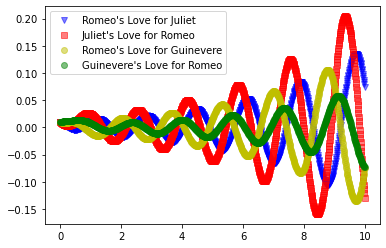

In [139]:
LoveTriangle(0.01, 0.01, 0.01, 0.01)

Juliet : 

c < 0 , 

(when |J| < 1) if Reomo love Juliet,her love will decrease,otherwise increase.

(when |J| > 1) if Reomo love Juliet,her love will increase,otherwise decrease.

d > 0 make her feeling become stronger. 

Guinevere : 

e > 0, 

(when |G| < 1) if Reomo love Guinevere, her love will increase,otherwise decrease.

(when |G| > 1) if Reomo love Guinevere, her love will decrease,otherwise increase.

f < 0 make her feeling become more weak.

Romeo : 

a < 0 make his feeling become more weak. 

b > 0 

(when the difference level of love between Juliet and Guinevere < 1) He will love the one who love him more.

(when the difference level of love between Juliet and Guinevere > 1) He will hate the one who love him more.

### 1.2 Studying chaos (2 points)

Please provide two sets of initial values of (Rj, J, Rg, & G) that can produce distinct model behaviors.

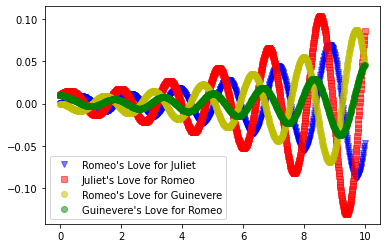

In [143]:
# Set initial value (Rj, J, Rg, G) = (0.01, 0.01, 0.01, 0.01)
LoveTriangle(0, 0.01, 0, 0.01)

Rj 是 J 的延遲反應

G 是 Rg 的延遲反應 

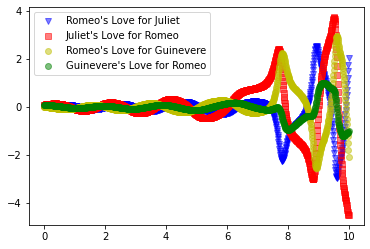

In [144]:
# Set initial value (Rj, J, Rg, G) = (0, 0.1, 0, 0.1)
LoveTriangle(0, 0.1, 0, 0.1)

由於initial value 設比較大，

當|J|>1時，J 會是 Rj 的延遲反應

當|G|>1時，Rg 會是 G 的延遲反應


## 2 Fix the simulation of "Growth and underinvestment" (5 points)

Although the simulation and explanation of "underinvested growth" seem reasonable, the simulation doesn't appear to describe "sufficiently invested growth" where the performance varialbe should be able to increase over time. Please do whatever you can to have a model that can simulate both phenomena. 

37.01369654264772


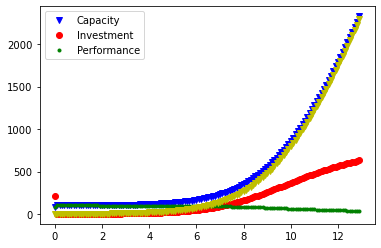

In [145]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,13,dt) # integration period
perf,inves=[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1 # more demands -> grow the company
    investment=10*(performance_standard-performance) # put in money if performance not reaching the standard
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    Demand2=Demand1+dt*0.75*growing_action*performance # Euler integration to reach equilibrium: capacity=demand
    Capacity.append(Capacity2)
    Demand.append(Demand2)
plot(t,Capacity[0:-1],'bv')
plot(t,inves,'ro')
plot(t,perf,'g.')
plot(t , Demand[0:-1],'yv')
legend(['Capacity','Investment','Performance']);
print(perf[-1]) # The final performance

In [133]:
def GrowthAndUnderInvestment(investment_degree , investment_rigidity):
    Max_Demand = 300
    performance_standard = 100 # Model parameter
    Capacity, Demand = [80], [1] # Initial values
    dt = .1 # step size for numerical integration
    t = arange(0, 30, dt) # integration period
    perf, inves = [], [0]
    for i in t:
        Capacity1, Demand1, investment1 = Capacity[-1], Demand[-1] , inves[-1] # the last element
        performance = Capacity1 - Demand1 # net gains
        perf.append(performance)
        growing_action = 0.01 * sqrt(Demand1) # more demands -> grow the company
        investment = investment_rigidity * investment1 + (1 - investment_rigidity) * investment_degree * max((performance_standard - performance), 0) / performance_standard # put in money if performance not reaching the standard
        inves.append(investment)
        Capacity2 = Capacity1 + dt * (investment) # Euler integration: put in money to increase capacity
        if(Demand1 > Max_Demand):
            Demand2 = Demand1 + dt * ((growing_action * performance) + (Max_Demand - Demand1))# Euler integration to reach equilibrium: capacity=demand
        else :
            Demand2 = Demand1 + dt * (growing_action * performance) # Euler integration to reach equilibrium: capacity=demand
        Capacity.append(Capacity2)
        Demand.append(Demand2)
        # print(performance,"    ",investment)
    plot(t,Capacity[0:-1],'bv')
    plot(t,inves[0:-1],'ro')
    plot(t,perf,'g.')
    plot(t , Demand[0:-1],'yv')
    legend(['Capacity','Investment','Performance','Demand']);
    print(perf[-1]) # The final performance

由於 demand 成長太快，將growing action 改為 sqrt(Demand1)，並新增 Max_Demand 讓demand不會增加到 infinity.

調整 investment_rigidity (investment_rigidity越高時，前一次investment對下一次的影響更重要)

調整 investment_degree 代表公司感受到performance未達標準時所願意增加investment的程度

39.22294122755794


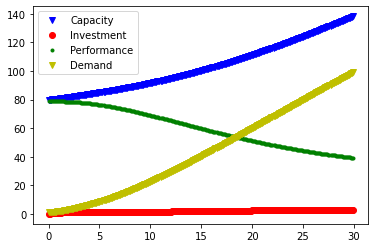

In [134]:
# investment_degree=5, insufficient investment
GrowthAndUnderInvestment(5, 0.8)

當 investment_degree=5  => insufficient investment,打從一開始就投資不足performance不斷往下降.

78.8395516831032


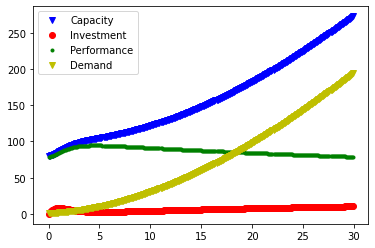

In [135]:
# investment_degree=50, insufficient investment
GrowthAndUnderInvestment(50, 0.8)

當 investment_degree=50 => insufficient investment,一開始就投資充足，performance有起色，但隨著demand增加，demand增長速度也變快，投資力道相對不足，performance漸漸往下降.

96.91273247863523


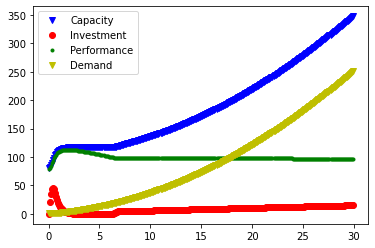

In [136]:
# investment_degree=500, sufficient investment
GrowthAndUnderInvestment(500, 0.8)

當 investment_degree=500 => sufficient investment,一開始就投資充足，performance有起色，隨著demand增加，demand增長速度也變快，但投資力道充足，performance可以維持在接近100.

99.97302317056847


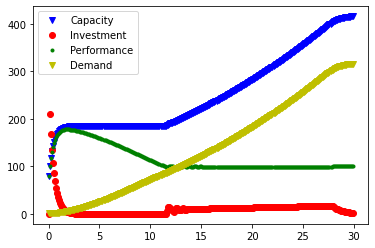

In [146]:
# investment_degree=5000, insufficient investment
GrowthAndUnderInvestment(5000, 0.8)

當 investment_degree=5000 => sufficient investment,一開始就投資充，performance有起色逐漸超過100，後來發現投資太多慢慢降低投資，使performance維持在100，最後可看出demand達到500就不會再增加．